# The Merge Algorithm!

In [1]:
import Merge_Full

from decimal import *
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython import display

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

Intiate Algorithm 

In [2]:
Show_Reflection = True
Reflection_Use_Time = True
Reflection_Stop_time = 40

Show_Circuit_Info = True
Calculate_Time_at_Position = True
Save_Output = False
is_LCM = True
Save_Video = False

In [3]:
L_Time = '10'
C_Time = '3'

L_impedance = '1000'
C_impedance = '1'

number_periods = '1'

# Inductor
L_T = Decimal(L_Time)/Decimal('2')
L_Z = Decimal(L_impedance)
L_L = str(L_T*L_Z)
L_C = str(L_T/L_Z)
print("Inductor Inductance   :", L_L)
print("Inductor Capacitance  :", L_C)

# Capacitor
C_T = Decimal(C_Time)/Decimal('2')
C_Z = Decimal(C_impedance)
C_L = str(C_T*C_Z)
C_C = str(C_T/C_Z)
print("Capacitor Inductance  :", C_L)
print("Capacitor Capacitance :", C_C)


#  INDUCTANCE, CAPACITANCE, LENGTH
Inductor_List = [L_L,L_C,'1']
Capacitor_List = [C_L,C_C,'1']

# VOLTAGE, PERIODS, BUCK, LOAD
Circuit_List = ['1',number_periods,False,'12']

Inductor Inductance   : 5000
Inductor Capacitance  : 0.005
Capacitor Inductance  : 1.5
Capacitor Capacitance : 1.5


In [4]:
Storage_Inductor_Completed, Storage_Capacitor_Completed = Merge_Full.Process_Wavefronts(
    Inductor_List,
    Capacitor_List, 
    Circuit_List)


Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        5000
Inductor Capacitance Per Length :       0.005
Inductor Length :                       1
Inductor Total Inductance :             5000
Inductor Total Capacitance :            0.005
Inductor Velocity :                     0.2
Inductor Time Delay :                   5
Inductor Impedance :                    1.00E+3

- The Capacitor -
Capacitor Inductance Per Length :       1.5
Capacitor Capacitance Per Length :      1.5
Capacitor Length :                      1
Capacitor Total Inductance :            1.5
Capacitor Total Capacitance :           1.5
Capacitor Velocity :                    0.6666666666666666666666666667
Capacitor Time Delay :                  1.500000000000000000000000000
Capacitor Impedance :                   1

- The Circuit -
Votage Source Magnitude :               1
Number Periods :                        1
Simulation Stop Time :                  544.13980927030116732699874

In [5]:
Frequency = 1/(Decimal.sqrt(Merge_Full.Capacitor_Total_Capacitance*Merge_Full.Inductor_Total_Inductance))

In [6]:
2*math.pi/float(Frequency)

544.1398092702653

In [7]:
def represent_Reflection_Diagram(ax,stop_time = Merge_Full.Simulation_Stop_Time):

    ax.axhline(linewidth=1, color='k')
    ax.axvline(linewidth=1, color='k')
    
    ax.plot([-1,-1],[0,stop_time],'k')
    ax.plot([1,1],[0,stop_time],'k')
    #ax.plot([-1,1],[stop_time,stop_time],'k')
    
    #ax.get_xaxis().set_visible(False)
    ax2 = ax.secondary_yaxis('right')
    ax.set_xticks = ([])
    ax2.set_xticks = ([])
    ax.set_xticklabels = ('')
    ax2.set_xticklabels = ('')
    
    ax.set_ylabel('Capacitor Time Delay = '+ C_Time, fontsize = 'large')
    ax2.set_ylabel('Inductor Time Delay = '+ L_Time, fontsize = 'large')
    #ax.yaxis.set_ticks(np.arange(0, stop_time, 1))
    #ax2.yaxis.set_ticks(np.arange(0, stop_time, 1))
    
    ax.set_title('Capacitor Impedance = '+ C_impedance +'Ω, Inductor Impedance = ' + L_impedance+ 'Ω', fontsize = 'large')
    ax.set_xlabel('Relative distance down Transmission Line')
        
    ax.yaxis.set_major_locator(MultipleLocator(float(C_Time)))
    ax2.yaxis.set_major_locator(MultipleLocator(float(L_Time)))
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

    # For the minor ticks, use no labels; default NullFormatter.
    ax.yaxis.set_minor_locator(MultipleLocator(float(C_Time)/2))
    ax2.yaxis.set_minor_locator(MultipleLocator(float(L_Time)/2))


    for wave in Storage_Capacitor_Completed:

        x1 = -wave.position_start
        x2 = -wave.position_end

        y1 = wave.time_start
        y2 = wave.time_end

        if(wave.time_start <=stop_time):
            ax.plot([x1,x2],[y1,y2],'b-')


    for wave in Storage_Inductor_Completed:

        x1 = wave.position_start
        x2 = wave.position_end

        y1 = wave.time_start
        y2 = wave.time_end

        if(wave.time_start <=stop_time):
            ax.plot([x1,x2],[y1,y2],'k-')

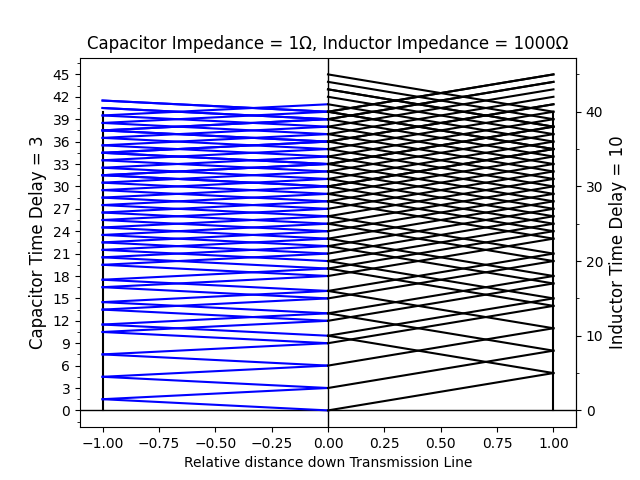

In [8]:
%matplotlib widget
#%matplotlib

if(Show_Reflection):
    fig_reflection, ax_reflection = plt.subplots()
    if(Reflection_Use_Time):
        represent_Reflection_Diagram(ax_reflection,Reflection_Stop_time)
    else:
        represent_Reflection_Diagram(ax_reflection)


## Position Equirey -> Time Waveform

In [9]:
Voltage_Array_Capacitor = []
Current_Array_Capacitor = []
Time_Array_Capacitor = []

def inspect_time_waveform_at_position(Wavefront_Array, position):

    Voltage_Array = []
    Current_Array = []
    Time_Array = []

    found_index = True

    for wave in Wavefront_Array:
        
        time = wave.Time_at_position(position)

        try:
            index = Time_Array.index(time)
            found_index = True
        except:
            found_index = False

        if(found_index == False):
            Time_Array.append(time)
            Voltage_Array.append(wave.magnitude_voltage)
            Current_Array.append(wave.magnitude_current)
        else:
            Voltage_Array[index] = Voltage_Array[index] + wave.magnitude_voltage
            Current_Array[index] = Current_Array[index] + wave.magnitude_current

    Time_Voltage_Current_Array = sorted(zip(Time_Array,Voltage_Array,Current_Array))
    
    Time_Array, Voltage_Array, Current_Array  = zip(*Time_Voltage_Current_Array)

    Time_Array = list( Time_Array )
    Voltage_Array = list( Voltage_Array )
    Current_Array = list( Current_Array )

    for i in range(1,len(Voltage_Array)-1):
        Voltage_Array[i] = Voltage_Array[i-1]+Voltage_Array[i] 
        Current_Array[i] = Current_Array[i-1]+Current_Array[i] 

    return Voltage_Array, Current_Array, Time_Array

Plot Inductor Voltage

In [10]:
def lcm(x:Decimal, y:Decimal):

    x_num,x_den = x.as_integer_ratio()
    y_num,y_den = y.as_integer_ratio()

    multiply_factor = x_den * y_den

    x_big = x_num * multiply_factor   
    y_big = y_num * multiply_factor   

    GCD = math.gcd(x_big,y_big)

    LCM = x_big* y_big/(GCD*multiply_factor)

    return LCM

def lcm_gcd(x:Decimal, y:Decimal):

    x_num,x_den = x.as_integer_ratio()
    y_num,y_den = y.as_integer_ratio()

    common_den = Decimal(str(x_den * y_den))

    x_big = x_num * y_den   
    y_big = y_num * x_den   
    
    GCD_big = Decimal(str(math.gcd(x_big,y_big)))

    GCD = GCD_big/common_den

    LCM = x*y/(GCD)
    
    return LCM, GCD

In [11]:
lcm_gcd(Merge_Full.Inductor_Time,Merge_Full.Capacitor_Time)

(Decimal('15.00000000000000000000000000'), Decimal('0.5'))

In [12]:
lcm_gcd(2*Merge_Full.Inductor_Time,2*Merge_Full.Capacitor_Time)

(Decimal('30.00000000000000000000000000'), Decimal('1'))

In [13]:
position = 0
Voltage_Inductor = []
Current_Inductor = []
Time_Inductor = []
Voltage_Capacitor = []
Current_Capacitor = []
Time_Capacitor = []

voltage_Circuit_Inductor = []
Current_Circuit_Inductor = []

voltage_Circuit_Capacitor = []
Current_Circuit_Capacitor = []

error_Voltage_Inductor = []
error_Voltage_Capacitor = []
error_Current = []

error_Time_Capacitor = []
error_Time_Inductor = []
error_Time_Capacitor_Index = 0
error_Time_Inductor_Index = 0

def Calculate_Voltage_Inductor (t):
    return float(Merge_Full.Voltage_Souce_Magnitude)*math.cos(Frequency*t)

def Calculate_Voltage_Capacitor (t):
    return float(Merge_Full.Voltage_Souce_Magnitude) - float(Merge_Full.Voltage_Souce_Magnitude)*math.cos(Frequency*t) 

def Calculate_Current (t):
    return float(Merge_Full.Voltage_Souce_Magnitude)*float(Decimal.sqrt(Merge_Full.Capacitor_Total_Capacitance/Merge_Full.Inductor_Total_Inductance))*math.sin(Frequency*t)

def Error_With_Zero(Real, Ideal):
    if Ideal == 0 :
        return Real
    else:
        return (Real - Ideal)/Ideal

if(Calculate_Time_at_Position):
    Voltage_Inductor, Current_Inductor, Time_Inductor = inspect_time_waveform_at_position(Storage_Inductor_Completed,position)
    Voltage_Capacitor, Current_Capacitor, Time_Capacitor = inspect_time_waveform_at_position(Storage_Capacitor_Completed,position)

    Voltage_Circuit_Inductor = list(map(Calculate_Voltage_Inductor, Time_Inductor))
    Current_Circuit_Inductor = list(map(Calculate_Current, Time_Inductor))

    Voltage_Circuit_Capacitor = list(map(Calculate_Voltage_Capacitor, Time_Capacitor))
    
    
    error_Voltage_Inductor = [(float(v_i) - c_i) for v_i, c_i in zip(Voltage_Inductor, Voltage_Circuit_Inductor)]
    error_Voltage_Capacitor = [(float(v_i) - c_i) for v_i, c_i in zip(Voltage_Capacitor, Voltage_Circuit_Capacitor)]
    error_Current = [(float(v_i) - c_i) for v_i, c_i in zip(Current_Capacitor, Current_Circuit_Inductor)]

    error_Time_Capacitor = [abs(Merge_Full.Simulation_Stop_Time - t) for t in Time_Capacitor]
    error_Time_Capacitor_Index = error_Time_Capacitor.index(min(error_Time_Capacitor))
    
    error_Time_Inductor = [abs(Merge_Full.Simulation_Stop_Time - t) for t in Time_Inductor]
    error_Time_Inductor_Index = error_Time_Inductor.index(min(error_Time_Inductor))
    
    error_Voltage_Inductor = error_Voltage_Inductor[0:error_Time_Inductor_Index]
    error_Voltage_Capacitor = error_Voltage_Capacitor[0:error_Time_Capacitor_Index]
    error_Current = error_Current[0:error_Time_Capacitor_Index]

In [14]:
def Plot_Voltage_Current_Time_Multi(fig,ax,V_Inductor,I_Inductor,T_Inductor,V_Capacitor,I_Capacitor,T_Capacitor):

    grid_LCM = float(lcm(Merge_Full.Inductor_Time*2,Merge_Full.Capacitor_Time*2))
    Stop_Time_Multiple = math.floor(float(Merge_Full.Simulation_Stop_Time)/grid_LCM)

    ax[0,0].set_title('Inductor Voltage')
    ax[0,0].set_xlabel('time (s)')
    ax[0,0].set_ylabel('Voltage (V)')
    ax[0,0].set_xlim(0,Merge_Full.Simulation_Stop_Time)
    ax[0,0].step(T_Inductor ,V_Inductor,where='post')
    ax[0,0].plot(T_Inductor ,Voltage_Circuit_Inductor)
    #ax[0,0].set_xticks(np.arange(0,grid_LCM*Stop_Time_Multiple,grid_LCM))
    ax[0,0].grid()

    ax[0,1].set_title('Inductor Current')
    ax[0,1].set_xlabel('time (s)')
    ax[0,1].set_ylabel('Current (A)')
    ax[0,1].set_xlim(0,Merge_Full.Simulation_Stop_Time)
    ax[0,1].step(T_Inductor ,I_Inductor,where='post')
    ax[0,1].plot(T_Inductor ,Current_Circuit_Inductor)
    #ax[0,1].set_xticks(np.arange(0,grid_LCM*Stop_Time_Multiple,grid_LCM))
    ax[0,1].grid()

    ax[1,0].set_title('Capacitor Voltage')
    ax[1,0].set_xlabel('time (s)')
    ax[1,0].set_ylabel('Voltage (V)')
    ax[1,0].set_xlim(0,Merge_Full.Simulation_Stop_Time)
    ax[1,0].step(T_Capacitor ,V_Capacitor,where='post')
    ax[1,0].plot(T_Capacitor ,Voltage_Circuit_Capacitor)
    #ax[1,0].set_xticks(np.arange(0,grid_LCM*Stop_Time_Multiple,grid_LCM))
    ax[1,0].grid()

    ax[1,1].set_title('Capacitor Current')
    ax[1,1].set_xlabel('time (s)')
    ax[1,1].set_ylabel('Current (A)')
    ax[1,1].set_xlim(0,Merge_Full.Simulation_Stop_Time)
    ax[1,1].step(T_Capacitor ,I_Capacitor,where='post')
    ax[1,1].plot(T_Inductor ,Current_Circuit_Inductor)
    #ax[1,1].set_xticks(np.arange(0,grid_LCM*Stop_Time_Multiple,grid_LCM))
    ax[1,1].grid()

    title = ("Time Wavefroms of Capacitor and inductor at position " +str(position)+"m" +'\n' 
            + 'ZL = ' + L_impedance + 'Ω, '+'ZC = ' + C_impedance + 
            'Ω, A = ' + L_Time + 's, B = ' + C_Time + 's' )

    fig.suptitle(title)
    fig.tight_layout()

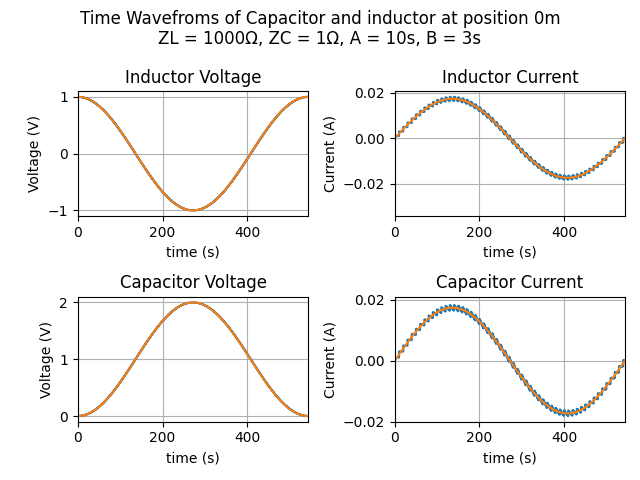

In [15]:
if(Calculate_Time_at_Position):

    fig,ax = plt.subplots(2,2)
    Plot_Voltage_Current_Time_Multi(fig,ax,Voltage_Inductor, Current_Inductor, Time_Inductor,Voltage_Capacitor, Current_Capacitor, Time_Capacitor)

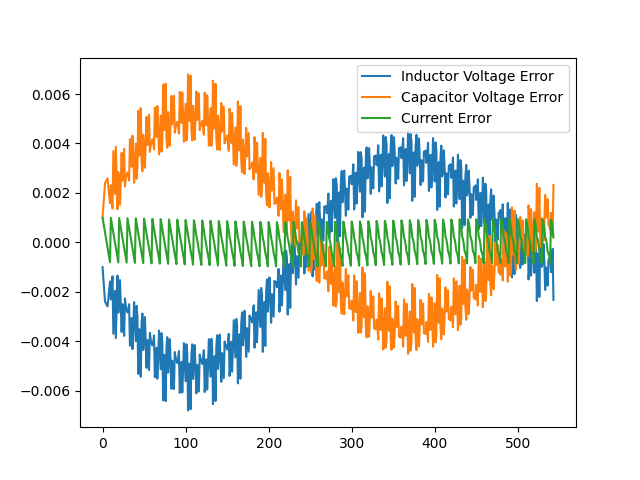

In [16]:
Time_Inductor

fig_error, ax_error = plt.subplots()

ax_error.plot(Time_Inductor[0:error_Time_Inductor_Index],error_Voltage_Inductor[0:error_Time_Inductor_Index],label='Inductor Voltage Error')
ax_error.plot(Time_Capacitor[0:error_Time_Capacitor_Index],error_Voltage_Capacitor[0:error_Time_Capacitor_Index],label='Capacitor Voltage Error')
ax_error.plot(Time_Capacitor[0:error_Time_Capacitor_Index],error_Current[0:error_Time_Capacitor_Index],label='Current Error')

ax_error.legend()

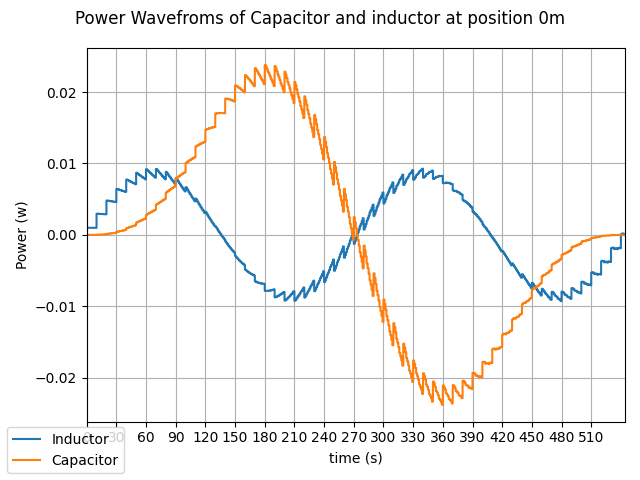

In [17]:
fig_power, ax_power = plt.subplots()

Power_Inductor = []

for (voltage, current) in zip(Voltage_Inductor,Current_Inductor):
    Power_Inductor.append(voltage*current)

Power_Capacitor = []

for (voltage, current) in zip(Voltage_Capacitor,Current_Capacitor):
    Power_Capacitor.append(voltage*current)

ax_power.set_xlabel('time (s)')
ax_power.set_ylabel('Power (w)')
ax_power.set_xlim(0,Merge_Full.Simulation_Stop_Time)
ax_power.step(Time_Inductor ,Power_Inductor,where='post',label='Inductor')
ax_power.step(Time_Capacitor ,Power_Capacitor,where='post', label = 'Capacitor')

grid_LCM = float(lcm(Merge_Full.Inductor_Time*2,Merge_Full.Capacitor_Time*2))
Stop_Time_Multiple = math.floor(float(Merge_Full.Simulation_Stop_Time)/grid_LCM)
ax_power.set_xticks(np.arange(0,grid_LCM*Stop_Time_Multiple,grid_LCM))
ax_power.grid()

title = "Power Wavefroms of Capacitor and inductor at position " +str(position)+"m"


fig_power.suptitle(title)
fig_power.tight_layout()
fig_power.legend(loc='lower left')

In [18]:
def inspect_spatial_waveform_at_time(Wavefront_Array, time):
    
    Voltage_In_Position = []
    Current_In_Position = []
    Positions = []

    Current_Forward = []
    Current_Backward = []

    Voltage_Forward = []
    Voltage_Backward = []

    Positions_Forward = []
    Positions_Backward = []

    found_index = True

    query_time = time
    DC_Current = 0
    DC_Voltage = 0
    length = 0

    for wave in Wavefront_Array:

        position = 0
        length = wave.length

        position = wave.Position_at_time(query_time)

        if position >= 0:

            if wave.position_start == 0:
                try:
                    index = Positions_Forward.index(position)
                    found_index = True
                except:
                    found_index = False

                if found_index:
                    Current_Forward[index] += wave.magnitude_current
                    Voltage_Forward[index] += wave.magnitude_voltage
                else:
                    Positions_Forward.append(position)
                    Current_Forward.append(wave.magnitude_current)
                    Voltage_Forward.append(wave.magnitude_voltage)

                    Positions.append(position)

            else:
                try:
                    index = Positions_Backward.index(position)
                    found_index = True
                except:
                    found_index = False

                if found_index:
                    Current_Backward[index] += wave.magnitude_current
                    Voltage_Backward[index] += wave.magnitude_voltage
                else:
                    Positions_Backward.append(position)
                    Current_Backward.append(wave.magnitude_current)
                    Voltage_Backward.append(wave.magnitude_voltage)

                    Positions.append(position)


        elif wave.time_end <= query_time:
            DC_Current += wave.magnitude_current
            DC_Voltage += wave.magnitude_voltage

    Forward_Zip = list(zip(Positions_Forward,Voltage_Forward,Current_Forward))
    Backward_Zip = list(zip(Positions_Backward,Voltage_Backward,Current_Backward))

    #Remove doubles
    Positions = list(set(Positions))
    Positions = sorted(Positions)

    Positions.append(length)
    Positions = [0] + Positions

    Current_In_Position = [DC_Current]*len(Positions)
    Voltage_In_Position = [DC_Voltage]*len(Positions)

    # Current_In_Position_Sorted_Capacitor = sorted(zip(Positions,Current_In_Position))


    for pos,forward_voltage,forward_current in Forward_Zip:

        index = Positions.index(pos)

        for i in range(0,index):
            Current_In_Position[i] += forward_current
            Voltage_In_Position[i] += forward_voltage

    for pos,backward_voltage,backward_current in Backward_Zip:

        index = Positions.index(pos)

        for i in range(index,len(Positions)):
            Current_In_Position[i] += backward_current
            Voltage_In_Position[i] += backward_voltage

    return Voltage_In_Position,Current_In_Position,Positions

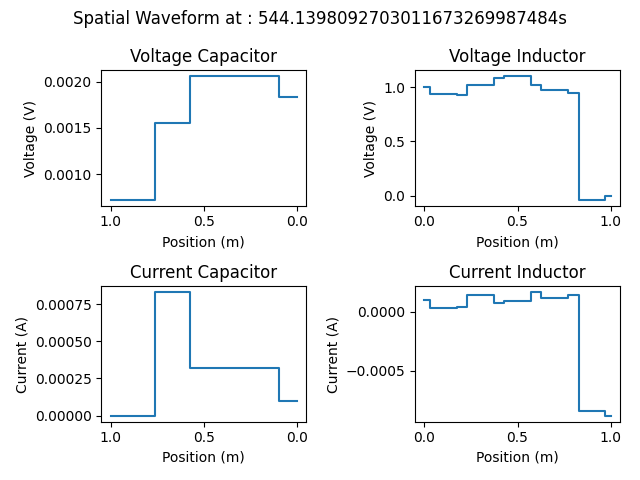

In [19]:
fig_Current_In_Position_capacitor, ax_positions = plt.subplots(2,2)

time =  Merge_Full.Simulation_Stop_Time
Capacitor_Voltage_in_Position,Capacitor_Current_in_Position, Capacitor_Positions = inspect_spatial_waveform_at_time(Storage_Capacitor_Completed,time)
Inductor_Voltage_in_Position,Inductor_Current_in_Position, Inductor_Positions = inspect_spatial_waveform_at_time(Storage_Inductor_Completed,time)

ax_positions[0,0].set_title("Voltage Capacitor")
ax_positions[0,0].set_xlabel('Position (m)')
ax_positions[0,0].set_ylabel('Voltage (V)')
ax_positions[0,0].step(Capacitor_Positions,Capacitor_Voltage_in_Position,where='post')
ax_positions[0,0].invert_xaxis()

ax_positions[1,0].set_title("Current Capacitor")
ax_positions[1,0].set_xlabel('Position (m)')
ax_positions[1,0].set_ylabel('Current (A)')
ax_positions[1,0].step(Capacitor_Positions,Capacitor_Current_in_Position,where='post')
ax_positions[1,0].invert_xaxis()

ax_positions[0,1].set_title("Voltage Inductor")
ax_positions[0,1].set_xlabel('Position (m)')
ax_positions[0,1].set_ylabel('Voltage (V)')
ax_positions[0,1].step(Inductor_Positions,Inductor_Voltage_in_Position,where='post')

ax_positions[1,1].set_title("Current Inductor")
ax_positions[1,1].set_xlabel('Position (m)')
ax_positions[1,1].set_ylabel('Current (A)')
ax_positions[1,1].step(Inductor_Positions,Inductor_Current_in_Position,where='post')

title = "Spatial Waveform at : " + str(time) + "s"

fig_Current_In_Position_capacitor.suptitle(title)
fig_Current_In_Position_capacitor.tight_layout()

# How to Save and Load data 

first save the lists

In [20]:
import pickle

if(Save_Output):
    Inductor_Zip = zip(Voltage_Inductor, Current_Inductor, Time_Inductor)
    filename = "Inductor" +"_I_"+ str(Merge_Full.Inductor_Total_Inductance) + "_C_" + str(Merge_Full.Capacitor_Total_Capacitance)

    with open(filename, 'wb') as f: 
        pickle.dump(Inductor_Zip, f) 

    Capacitor_Zip = zip(Voltage_Capacitor, Current_Capacitor, Time_Capacitor)
    filename = "Capacitor" +"_I_"+ str(Merge_Full.Inductor_Total_Inductance) + "_C_" + str(Merge_Full.Capacitor_Total_Capacitance)

    with open(filename, 'wb') as f: 
        pickle.dump(Capacitor_Zip, f) 

Then load them like so:

In [21]:
if(Save_Output):
    with open('LC_Output\Inductor_I_35.0_C_25.0', 'rb') as f: 
        loaded_Inductor = pickle.load(f) 

    Voltage_loaded,Current_Loaded,Time_Loaded = zip(*loaded_Inductor)

    Voltage_loaded = list(Voltage_loaded)
    Current_Loaded = list(Current_Loaded)
    Time_Loaded = list(Time_Loaded)

In [22]:
lcm(Decimal('23'),Decimal('7'))

161.0

import pickle

with open('BUCK_Output\Inductor_I_35.0_C_25.0', 'rb') as f: 
        loaded_Inductor = pickle.load(f) 

Voltage_loaded,Current_Loaded,Time_Loaded = zip(*loaded_Inductor)

Voltage_Inductor_Loaded = list(Voltage_loaded)
Current_Inductor_Loaded = list(Current_Loaded)
Time_Inductor_Loaded = list(Time_Loaded)

with open('BUCK_Output\Capacitor_I_35.0_C_25.0', 'rb') as f: 
        loaded_Inductor = pickle.load(f) 

Voltage_loaded,Current_Loaded,Time_Loaded = zip(*loaded_Inductor)

Voltage_Capacitor_Loaded = list(Voltage_loaded)
Current_Capacitor_Loaded = list(Current_Loaded)
Time_Capacitor_Loaded = list(Time_Loaded)

fig,ax = plt.subplots(2,2)
position = 0

Plot_Voltage_Current_Time_Multi(fig,ax,Voltage_Inductor_Loaded, Current_Inductor_Loaded, Time_Inductor_Loaded,Voltage_Capacitor_Loaded, Current_Capacitor_Loaded, Time_Capacitor_Loaded)

In [23]:
# importing movie py libraries
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

duration = Decimal('60')
frames_per_second = Decimal('30')
number_frames = duration * frames_per_second

# INCREMENT ('0.0000025')

video_start_time = Decimal('0') #Simulation_Stop_Time/2 + 0*4*Simulation_Stop_Time/100
video_stop_time = Merge_Full.Simulation_Stop_Time
period_video_time = video_stop_time - video_start_time
delta_video_time = period_video_time/number_frames

lim_v1 = -1
lim_v2 = 1

lim_i1 = -0.2
lim_i2 = 0.2

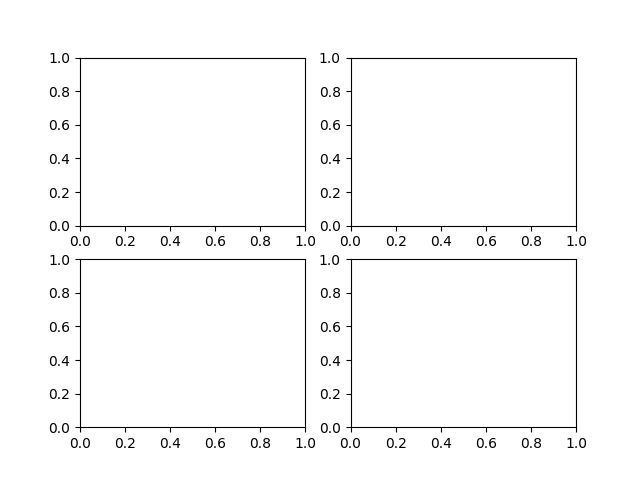

In [24]:
fig, ax = plt.subplots(2,2)

def animate_quad(t):
    
    n = Decimal(str(t)) * Decimal(str(frames_per_second))
    current_time = Decimal(str(video_start_time)) + n*delta_video_time

    fig.suptitle("Spatial Wavefroms at "+ str(current_time.quantize(Decimal('.00000001'), rounding=ROUND_HALF_DOWN)))

    Capacitor_Voltage_in_Position , Capacitor_Current_in_Position , Capacitor_Positions = inspect_spatial_waveform_at_time(Storage_Capacitor_Completed,current_time)
    Inductor_Voltage_in_Position,Inductor_Current_in_Position, Inductor_Positions = inspect_spatial_waveform_at_time(Storage_Inductor_Completed,current_time)

    ax[0,0].clear()
    ax[0,1].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    
    ax[0,0].set_title("Voltage Capacitor")
    ax[0,0].step(Capacitor_Positions,Capacitor_Voltage_in_Position,where='post')
    ax[0,0].set_xlim(0,1)
    #ax[0,0].set_ylim(0.0032, 0.0045) #ax[0,0].set_ylim(lim_v1, lim_v2)
    ax[0,0].invert_xaxis()

    ax[1,0].set_title("Current Capacitor")
    ax[1,0].step(Capacitor_Positions,Capacitor_Current_in_Position,where='post')
    ax[1,0].set_xlim(0,1)
    #ax[1,0].set_ylim(-0.02, 0.005) #ax[1,0].set_ylim(lim_i1, lim_i2)
    ax[1,0].invert_xaxis()

    ax[0,1].set_title("Voltage Inductor")
    ax[0,1].step(Inductor_Positions,Inductor_Voltage_in_Position,where='post')
    ax[0,1].set_xlim(0,1)
    #ax[0,1].set_ylim(-0.25, 1.25) #ax[0,1].set_ylim(lim_v1, lim_v2)

    ax[1,1].set_title("Current Inductor")
    ax[1,1].step(Inductor_Positions,Inductor_Current_in_Position,where='post')
    ax[1,1].set_xlim(0,1)
    #ax[1,1].set_ylim(-0.0135, -0.011) #ax[1,1].set_ylim(lim_i1, lim_i2)

    fig.tight_layout()

    return mplfig_to_npimage(fig)

if(Save_Video):
    # creating animation
    animation = VideoClip(animate_quad, duration = float(duration))
    
    # saving animation
    animation.write_videofile("my_animation.mp4", fps=float(frames_per_second), audio=False, preset='ultrafast')

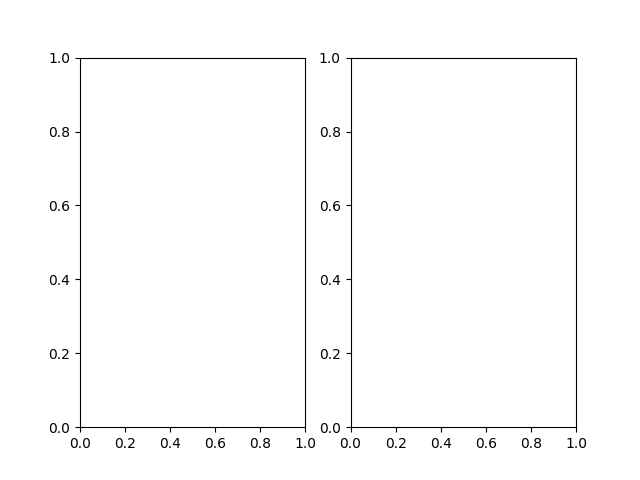

In [25]:
fig_2, (ax_1,ax_2) = plt.subplots(1,2)

def animate_power(t):
    
    n = Decimal(str(t)) * Decimal(str(frames_per_second))
    current_time = Decimal(str(video_start_time)) + n*delta_video_time

    fig_2.suptitle("Spatial Wavefroms at "+ str(current_time.quantize(Decimal('.00000001'), rounding=ROUND_HALF_DOWN)))
    
    Capacitor_Voltage_in_Position, Capacitor_Current_in_Position, Capacitor_Positions = inspect_spatial_waveform_at_time(Storage_Capacitor_Completed,current_time)
    Inductor_Voltage_in_Position, Inductor_Current_in_Position, Inductor_Positions = inspect_spatial_waveform_at_time(Storage_Inductor_Completed,current_time)

    Power_Capacitor_in_position = [a*b for a,b in zip(Capacitor_Voltage_in_Position,Capacitor_Current_in_Position)]
    Power_Inductor_in_position = [a*b for a,b in zip(Inductor_Voltage_in_Position,Inductor_Current_in_Position)]

    ax_1.clear()
    ax_2.clear()
    
    ax_1.set_title("Power Capacitor")
    ax_1.step(Capacitor_Positions,Power_Capacitor_in_position,where='post')
    ax_1.set_xlim(0,1)
    #ax_1.set_ylim(0, 0.0025) #ax[0,0].set_ylim(lim_v1, lim_v2)
    ax_1.invert_xaxis()

    ax_2.set_title("Power Inductor")
    ax_2.step(Inductor_Positions,Power_Inductor_in_position,where='post')
    ax_2.set_xlim(0,1)
    #ax_2.set_ylim(0, 0.05) #ax[0,1].set_ylim(lim_v1, lim_v2)

    fig_2.tight_layout()

    return mplfig_to_npimage(fig_2)

if(Save_Video):
    # creating animation
    animation = VideoClip(animate_power, duration = float(duration))
    
    # saving animation
    animation.write_videofile("my_power_animation.mp4", fps=float(frames_per_second))

In [26]:
print("=========================")
print("B - full simulation")
print("duration: " + str(duration))
print("video_start_time: " + str(video_start_time))
print("video_stop_time: " + str(video_stop_time))
print("period_video_time: " + str(period_video_time))
print("number_frames: " + str(number_frames))

B - full simulation
duration: 60
video_start_time: 0
video_stop_time: 544.1398092703011673269987484
period_video_time: 544.1398092703011673269987484
number_frames: 1800
